THIS PROJEXT IS DEDICATED TO MY MOM

IDEA OF THE PROJECT IS TO MAKE ONLINE LEARNING EASY AS IF THE MSG'S ARE COMING TO A GRP NOW WE CAN EVALUTE THE MSG FREQ
AND MARK ATTENDANCE OF THE STUDENTS

MRIDUL KAPOOR(NANU OP) IS CONTRIBUTOR TO THE PROJECT

REQUIRED DATA FOR THE PROJECT IS 
# ~WHATSAPP EXPORT CHAT in the form of .txt file


In [2]:
# References
# https://towardsdatascience.com/build-your-own-whatsapp-chat-analyzer-9590acca9014

In [3]:
# libraries needed for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [23]:
# Now we are going to use tokens to give the analyses of what the data the data stores
# {Date}, {Time} - {Author}: {Message}
# {31/05/2020}, {1:19 pm} - {Hitesh}: {🆗}

In [24]:
# Data Preperation


# Detecting the {Date} token and {Time} tokens

def startsWithDateTime(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [25]:
# Detecting the {Author} token

def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [26]:
# Extracting and Combining tokens

def getDataPoint(line):
    # line = 31/05/2020, 1:19 pm - Hitesh: 🆗
    
    splitLine = line.split(' - ') # splitLine = ['31/05/2020, 1:19 pm - Hitesh: 🆗']
    
    dateTime = splitLine[0] # dateTime = '31/05/2020, 1:19 pm'
    
    date, time = dateTime.split(', ') # date = '31/05/2020'; time = '1:19 pm'
    
    message = ' '.join(splitLine[1:]) # message = 'Hitesh: 🆗'
    
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Hitesh': '🆗']
        author = splitMessage[0] # author = 'Hitesh'
        message = ' '.join(splitMessage[1:]) # message = '🆗'
    else:
        author = None
    return date, time, author, message

In [32]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = "C:/Users/Lenovo/WhatsApp Chat with BTECH CE 5-6.txt"
with open(conversationPath, encoding="utf-8") as fp:
  
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDateTime(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer


In [33]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.to_csv("Tets.csv")

In [39]:
df.head()

,Date,Time,Author,Message
0,22/10/19,10:59,None,Messages to this group are now secured with en...
1,22/10/19,10:56,None,"Annie Walia created group ""B.Tech 2CE-5,6"""
2,22/10/19,10:59,None,Sandhya added you
3,22/10/19,10:59,None,Jeevan Pu left
4,22/10/19,11:00,None,"Raghav A5 6 added Hardeep A5, Ritesh Pu, Sajal..."


In [34]:
# Data Explorarion time
df.describe()

,Date,Time,Author,Message
count,11027,11027,10411,11027
unique,195,1107,54,8065
top,28/03/20,22:03,Chiru Baby,<Media omitted>
freq,618,57,1543,603


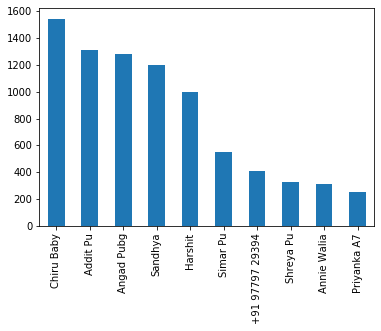

In [48]:
# top interacting active members
author_freqtable = df['Author'].value_counts() # Number of messages per author
top_10_author = author_freqtable.head(10) # Number of messages per author for the top 10 most active authors
top_10_author.plot(x ='No_of_msgs', y='Grp_Members', kind = 'bar') # Plot a bar chart using pandas built-in plotting apis

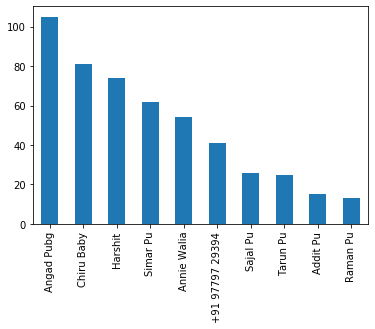

In [52]:
# top interacting active members who send most of the media

media_df = df[df['Message'] == '<Media omitted>']

author_media_msg_counts = media_df['Author'].value_counts()
top_10_author_media_msg_counts = author_media_msg_counts.head(10)
top_10_author_media_msg_counts.plot(x ='No_of_msgs', y='Grp_Members', kind = 'bar')

In [37]:
df['Author'].value_counts()

Chiru Baby             1543
Addit Pu               1308
Angad Pubg             1284
Sandhya                1201
Harshit                 995
Simar Pu                550
+91 97797 29394         408
Shreya Pu               327
Annie Walia             311
Priyanka A7             255
Ankush Pu Leet          238
Tarun Pu                201
Raghav A5 6             157
Pardeep Pu              153
Sajal Pu                146
Amrita Pu               125
Praditi Pu              116
Divya Pu                110
Ritesh Pu                94
Varun Pu                 86
Raman Pu                 70
+91 98724 68569          58
Parteek Pu               47
Mohit Bhadhan            41
Ashu Pu                  40
Jaskirat Pu              39
Hemu                     38
Nikhil Pathankot Pu      34
ArshiyA                  33
+91 88726 67806          32
Deepti Pu                31
Jagmeet Pu               29
Jasneet Pu               23
Chitvan Pu               23
Himankur Pu              22
Karandeep Leet      